<a href="https://colab.research.google.com/github/MrRezamo/All_links_from_given_webpage/blob/main/travel_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

## Purpose of the Project

## Tools & Technologies

# Data Loading

## Importing Essential Python Libraries
The beginning of a data analysis or data visualization project often involves importing various Python libraries. Here, we're importing some of the most commonly used libraries in data science

In [568]:
pip install -U klib

In [569]:
pip install -U sklearn

In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import klib
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("OK")

OK


## Mounting Google Drive in Google Colab
Google Colab allows you to write and execute Python in your browser, with zero configuration, free access to GPUs, and easy sharing options. It's an excellent tool for data analysis and machine learning tasks.

In [571]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading CSV Datasets in Google Colab Notebooks

In [572]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing_Projects/Travel_Insurance_Prediction_Data/TravelInsurancePrediction.csv')

# Data Overview

In [573]:
data.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Content

* Age: Age Of The Customer

* Employment Type: The Sector In Which Customer Is Employed

* GraduateOrNot: Whether The Customer Is College Graduate Or Not

* AnnualIncome: The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

* FamilyMembers: Number Of Members In Customer's Family

* ChronicDisease: Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

* FrequentFlyer: Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

* EverTravelledAbroad: Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

* TravelInsurance: Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

In [575]:
print(f"This data has {data.shape[0]} Rows")
print(f"This data has {data.shape[1]} Columns")

This data has 1987 Rows
This data has 10 Columns


In [576]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [577]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [578]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [579]:
data.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [580]:
data.duplicated().sum()

738

In [581]:
cats = []
nums = []
for i in data.columns:
  if data[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

cats =  ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
nums =  ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


<Axes: xlabel='Age', ylabel='Density'>

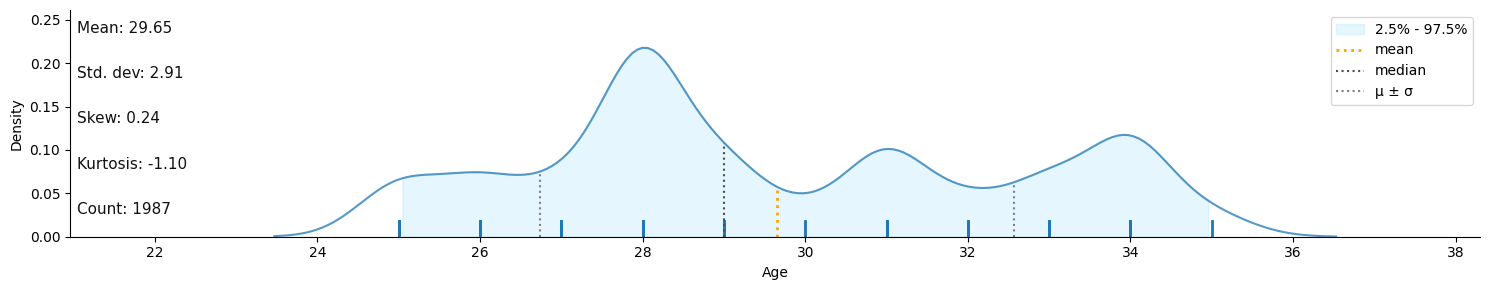

In [582]:
klib.dist_plot(data['Age'])

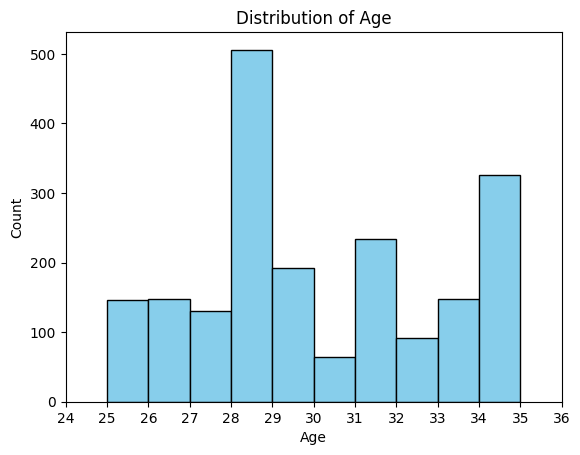

In [583]:
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(24,37))
plt.title('Distribution of Age')
plt.show()


In [584]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

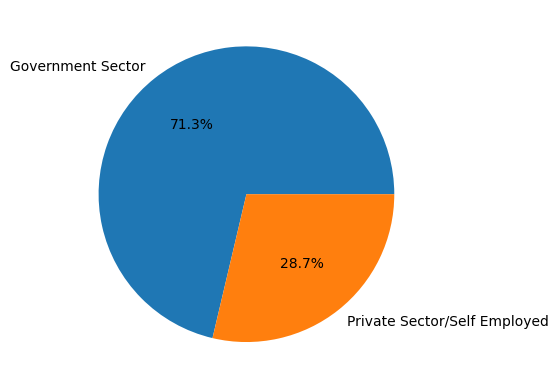

In [585]:
plt.pie(data['Employment Type'].value_counts(), labels=data['Employment Type'].unique(), autopct='%1.1f%%')
plt.show()

In [586]:
data['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

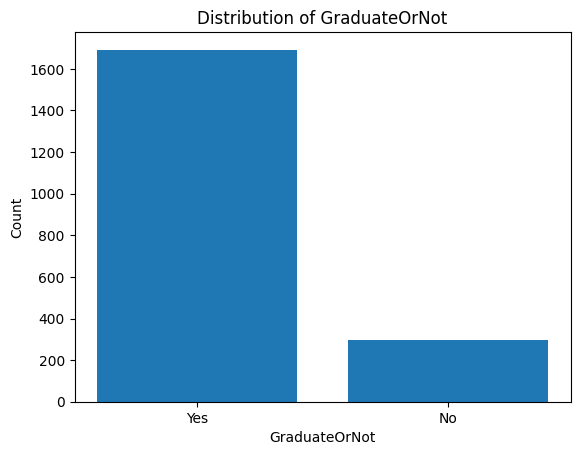

In [587]:
plt.bar(data['GraduateOrNot'].unique(), data['GraduateOrNot'].value_counts())
plt.xlabel('GraduateOrNot')
plt.ylabel('Count')
plt.title('Distribution of GraduateOrNot')
plt.show()

<Axes: xlabel='AnnualIncome', ylabel='Density'>

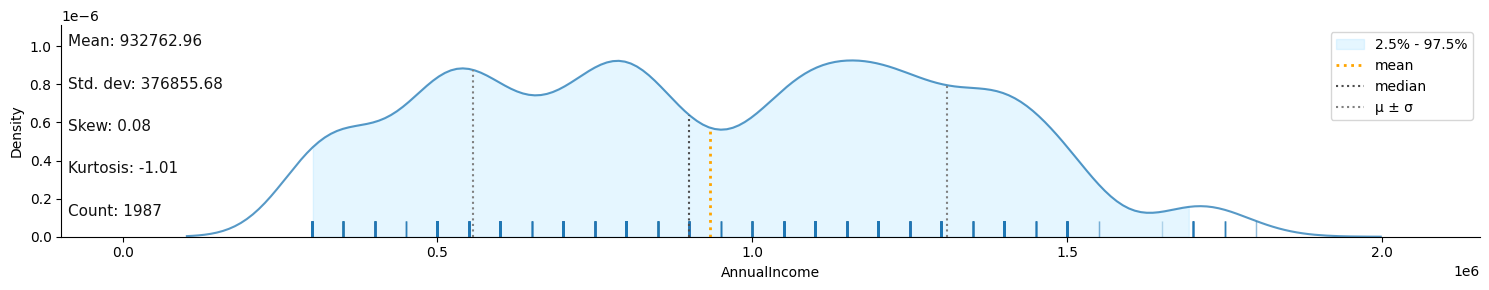

In [588]:
klib.dist_plot(data['AnnualIncome'])

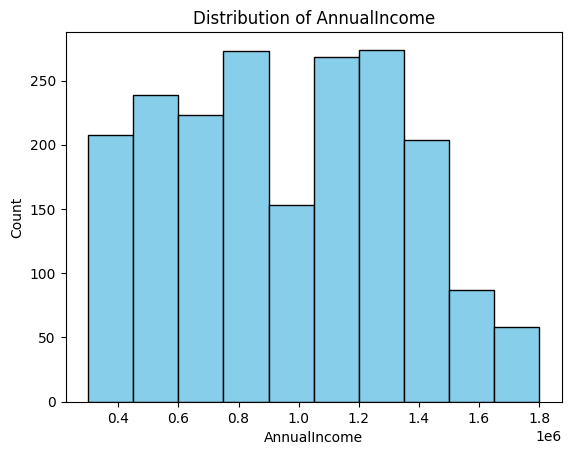

In [589]:
plt.hist(data['AnnualIncome'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Count')
plt.title('Distribution of AnnualIncome')
plt.show()

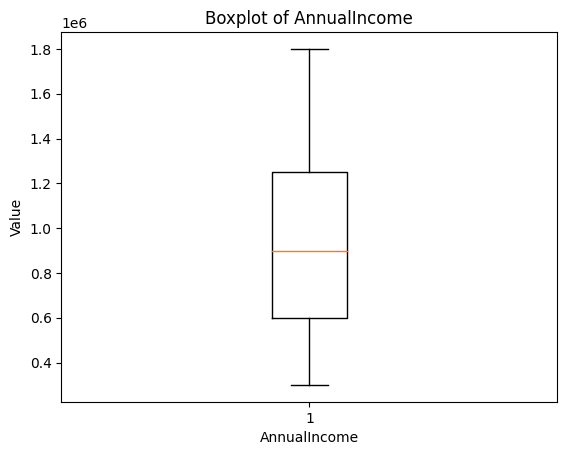

In [590]:
plt.boxplot(data['AnnualIncome'])
plt.xlabel('AnnualIncome')
plt.ylabel('Value')
plt.title('Boxplot of AnnualIncome')
plt.show()

In [591]:
np.sort(data['FamilyMembers'].unique())

array([2, 3, 4, 5, 6, 7, 8, 9])

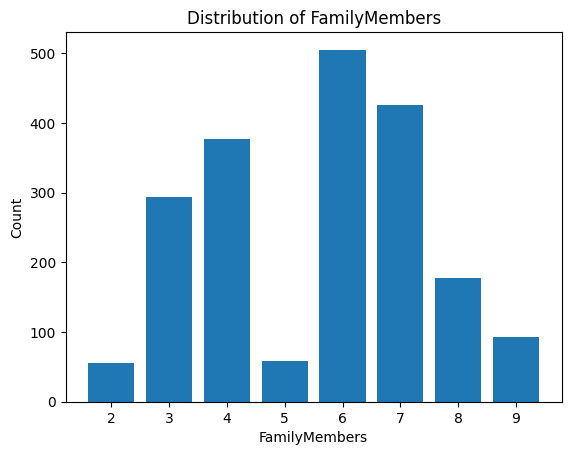

In [592]:
plt.bar(data['FamilyMembers'].unique(), data['FamilyMembers'].value_counts())
plt.xlabel('FamilyMembers')
plt.ylabel('Count')
plt.title('Distribution of FamilyMembers')
plt.show()

In [593]:
data['ChronicDiseases'].unique()

array([1, 0])

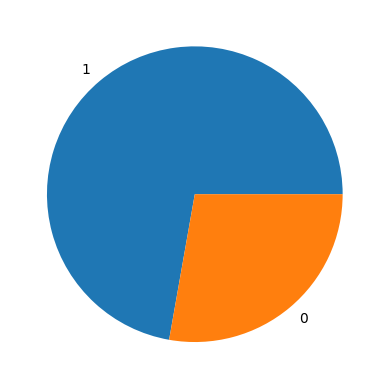

In [594]:
plt.pie(data['ChronicDiseases'].value_counts(), labels=data['ChronicDiseases'].unique())
plt.show()

In [595]:
print(data['ChronicDiseases'].value_counts(normalize=True) * 100)

0    72.219426
1    27.780574
Name: ChronicDiseases, dtype: float64


In [596]:
data['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

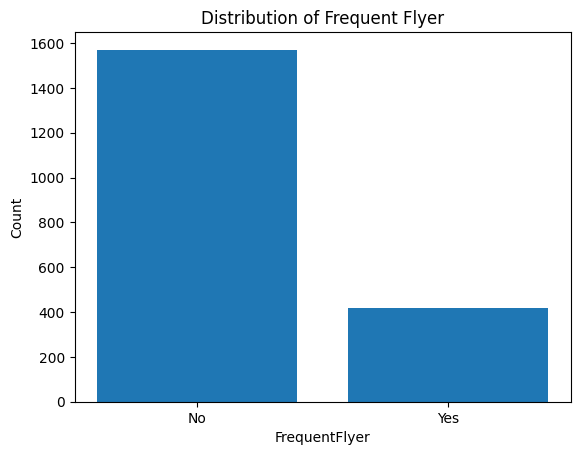

In [597]:
plt.bar(data['FrequentFlyer'].unique(), data['FrequentFlyer'].value_counts())
plt.xlabel('FrequentFlyer')
plt.ylabel('Count')
plt.title('Distribution of Frequent Flyer')
plt.show()

In [598]:
print(data['FrequentFlyer'].value_counts(normalize=True) * 100)

No     79.013588
Yes    20.986412
Name: FrequentFlyer, dtype: float64


In [599]:
data['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

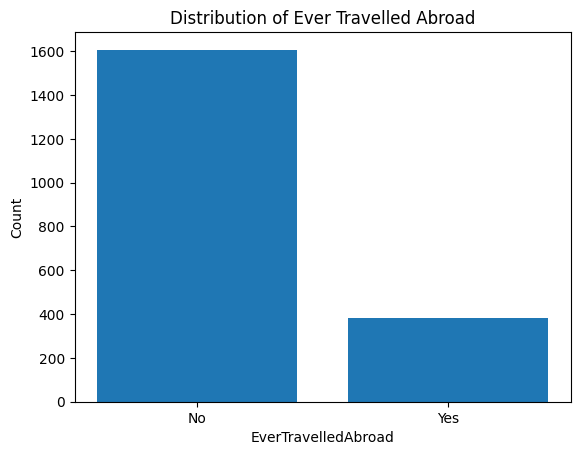

In [600]:
plt.bar(data['EverTravelledAbroad'].unique(), data['EverTravelledAbroad'].value_counts())
plt.xlabel('EverTravelledAbroad')
plt.ylabel('Count')
plt.title('Distribution of Ever Travelled Abroad')
plt.show()

In [601]:
print(data['EverTravelledAbroad'].value_counts(normalize=True) * 100)

No     80.875692
Yes    19.124308
Name: EverTravelledAbroad, dtype: float64


In [602]:
data['TravelInsurance'].unique()

array([0, 1])

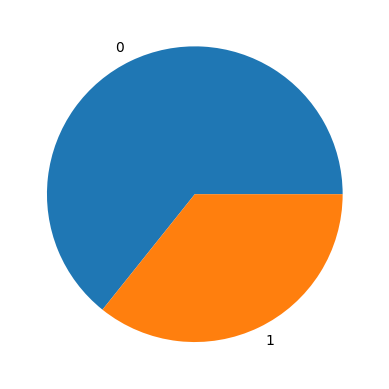

In [603]:
plt.pie(data['TravelInsurance'].value_counts(), labels=data['TravelInsurance'].unique())
plt.show()

In [604]:
print(data['TravelInsurance'].value_counts(normalize=True) * 100)

0    64.26774
1    35.73226
Name: TravelInsurance, dtype: float64


In [605]:
data.corr()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


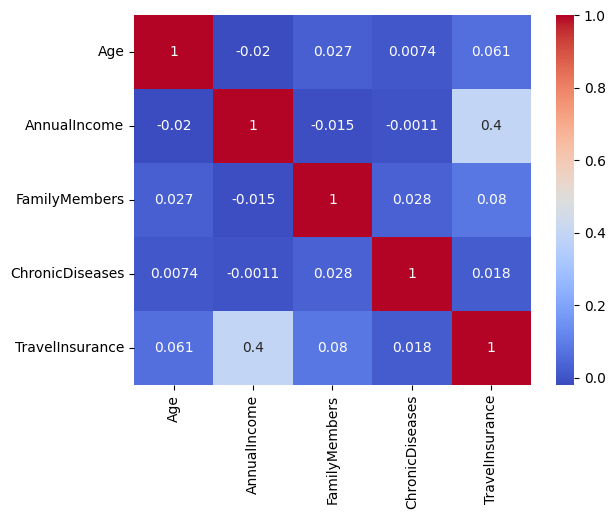

In [606]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [608]:
from scipy import stats

z_scores = data.select_dtypes(include=[np.number]).apply(stats.zscore)

potential_outliers = data[(np.abs(z_scores) > 3).any(axis=1)]

print(potential_outliers)

if potential_outliers.empty:
    print("Findings: There are no potential outliers in the dataset.")

Empty DataFrame
Columns: [Age, Employment Type, GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance]
Index: []
Findings: There are no potential outliers in the dataset.


In [609]:
print('cats = ',cats)
print('nums = ',nums)

cats =  ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
nums =  ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [610]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

label_encoder = LabelEncoder()
data['Employment Type'] = label_encoder.fit_transform(data['Employment Type'])

In [611]:
label_mapping_EmpType = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping_EmpType)

{'Government Sector': 0, 'Private Sector/Self Employed': 1}


In [612]:
data['GraduateOrNot'] = label_encoder.fit_transform(data['GraduateOrNot'])

In [613]:
label_mapping_Graduate = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping_Graduate)

{'No': 0, 'Yes': 1}


In [614]:
data['FrequentFlyer']= label_encoder.fit_transform(data['FrequentFlyer'])

In [615]:
label_mapping_FrequentFlyer = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping_FrequentFlyer)

{'No': 0, 'Yes': 1}


In [616]:
data['EverTravelledAbroad']= label_encoder.fit_transform(data['EverTravelledAbroad'])

In [617]:
label_mapping_EverTravelledAbroad = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping_EverTravelledAbroad)

{'No': 0, 'Yes': 1}


In [618]:
num_cols=['AnnualIncome','Age', 'FamilyMembers']

feature_to_scale = num_cols

data[feature_to_scale] = min_max_scaler.fit_transform(data[feature_to_scale])

In [619]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0


# Pipeline and Model

## Logistic Regression

In [620]:
from sklearn.preprocessing import Normalizer , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

scaler = StandardScaler()
normalize = Normalizer()
min_max_scaler = preprocessing.MinMaxScaler()

pipeline_Scaler = Pipeline([('scaler', scaler)])
pipeline_Normalize = Pipeline([('normalize', normalize)])
pipeline_Min_max = Pipeline([('min_max' , min_max_scaler)])

In [621]:
from sklearn.model_selection import train_test_split , cross_val_score , ShuffleSplit

X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [622]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [623]:
# Logistic Regression

pipeline = Pipeline([
    ('preprocessor', [scaler,normalize,min_max_scaler]),
    ('classifier', LogisticRegression())
])

param_grid = [
    # Logistic Regression
    {'preprocessor': [scaler , normalize , min_max_scaler],
     'classifier': [LogisticRegression()],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': np.arange(0.1,10)}
]

In [624]:
grid_search_LR = GridSearchCV(pipeline, param_grid , cv= 5)
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        [StandardScaler(), Normalizer(),
                                         MinMaxScaler()]),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression(C=4.1)],
                          'classifier__C': array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]),
                          'classifier__penalty': ['l1', 'l2'],
                          'preprocessor': [StandardScaler(), Normalizer(),
                                           MinMaxScaler()]}])

In [625]:
grid_search_LR.best_params_

{'classifier': LogisticRegression(C=4.1),
 'classifier__C': 4.1,
 'classifier__penalty': 'l2',
 'preprocessor': MinMaxScaler()}

In [626]:
grid_search_LR.best_score_

0.769029621252703

In [627]:
cv_shuffel = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [628]:
random_search_LR = RandomizedSearchCV(pipeline, param_grid, cv=cv_shuffel,scoring='accuracy',verbose=1,n_iter=100)
random_search_LR.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=100,
                   param_distributions=[{'classifier': [LogisticRegression(C=7.1)],
                                         'classifier__C': array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]),
                                         'classifier__penalty': ['l1', 'l2'],
                                         'preprocessor': [StandardScaler(),
                                                          Normalizer(),
                                                          MinMaxScaler()]}],
                   scoring='accuracy', verbose=1)

In [629]:
random_search_LR.best_params_

{'preprocessor': MinMaxScaler(),
 'classifier__penalty': 'l2',
 'classifier__C': 7.1,
 'classifier': LogisticRegression(C=7.1)}

In [630]:
random_search_LR.best_score_

0.8062893081761008

In [631]:
valid_LR = cross_val_score(random_search_LR.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_LR)

[0.81446541 0.78301887 0.8490566  0.77044025 0.81446541]


In [632]:
best_estimator = random_search_LR.best_estimator_
predictions = best_estimator.predict(X_test)

In [633]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.7688442211055276

In [634]:
metrics.confusion_matrix(y_test, predictions)

array([[236,  21],
       [ 71,  70]])

In [635]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0


In [636]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.514975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1589
Model:                          Logit   Df Residuals:                     1580
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.2105
Time:                        21:51:21   Log-Likelihood:                -818.29
converged:                       True   LL-Null:                       -1036.5
Covariance Type:            nonrobust   LLR p-value:                 2.956e-89
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.9949      0.279    -10.718      0.000      -3.543      -2.447
Ag

## Decision Tree Classifier

In [637]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

param_grid = {
    "classifier__max_depth": range(1, 10),
    "classifier__max_leaf_nodes": range(1, 10),
    'preprocessor': [scaler , normalize , min_max_scaler]
}

pipeline = Pipeline([
    ('preprocessor', [scaler,normalize,min_max_scaler]),
    ('classifier', DecisionTreeClassifier())
])

grid_search_DT = GridSearchCV(pipeline, param_grid, cv=5)

grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        [StandardScaler(), Normalizer(),
                                         MinMaxScaler()]),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': range(1, 10),
                         'classifier__max_leaf_nodes': range(1, 10),
                         'preprocessor': [StandardScaler(), Normalizer(),
                                          MinMaxScaler()]})

In [638]:
grid_search_DT.best_params_

{'classifier__max_depth': 3,
 'classifier__max_leaf_nodes': 7,
 'preprocessor': StandardScaler()}

In [639]:
grid_search_DT.best_score_

0.8332420689244688

In [640]:
valid_DT = cross_val_score(grid_search_DT.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_DT)

[0.86163522 0.85534591 0.87421384 0.84591195 0.81761006]


In [641]:
random_search_DT = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5 )
random_search_DT.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier',
                                              DecisionTreeClassifier())]),
                   param_distributions={'classifier__max_depth': range(1, 10),
                                        'classifier__max_leaf_nodes': range(1, 10),
                                        'preprocessor': [StandardScaler(),
                                                         Normalizer(),
                                                         MinMaxScaler()]})

In [642]:
random_search_DT.best_params_

{'preprocessor': MinMaxScaler(),
 'classifier__max_leaf_nodes': 7,
 'classifier__max_depth': 8}

In [643]:
random_search_DT.best_score_

0.8332420689244688

In [644]:
valid_DT = cross_val_score(random_search_DT.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_DT)

[0.86163522 0.85534591 0.87421384 0.83018868 0.81761006]


In [645]:
best_estimator = random_search_DT.best_estimator_
predictions = best_estimator.predict(X_test)

In [646]:
from sklearn.metrics import classification_report
metrics_DT = classification_report(y_test, predictions)
print(metrics_DT)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398



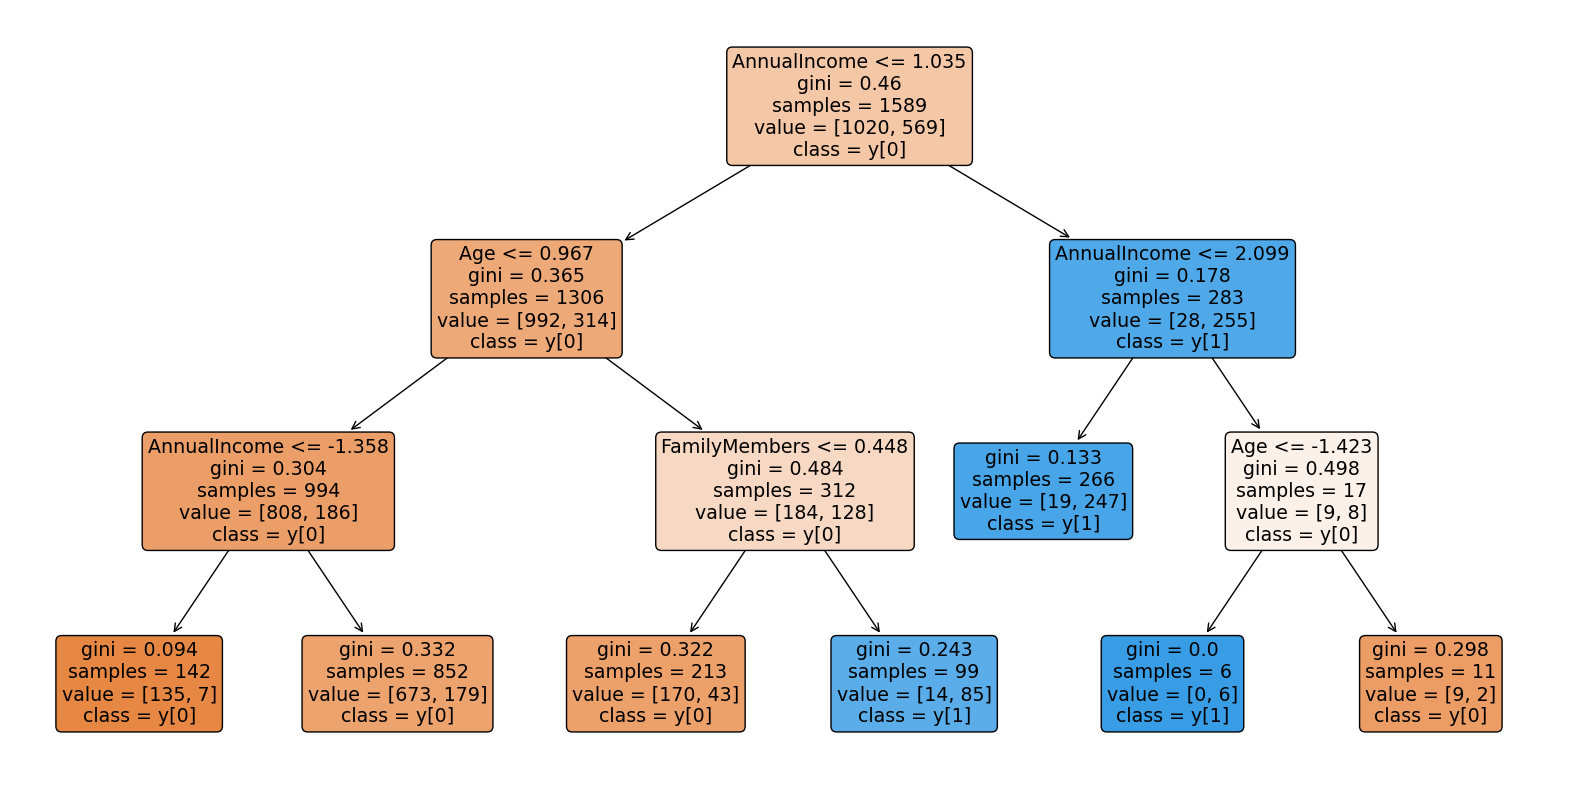

In [647]:
best_tree = grid_search_DT.best_estimator_.named_steps['classifier']

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, proportion=False)
plt.show()

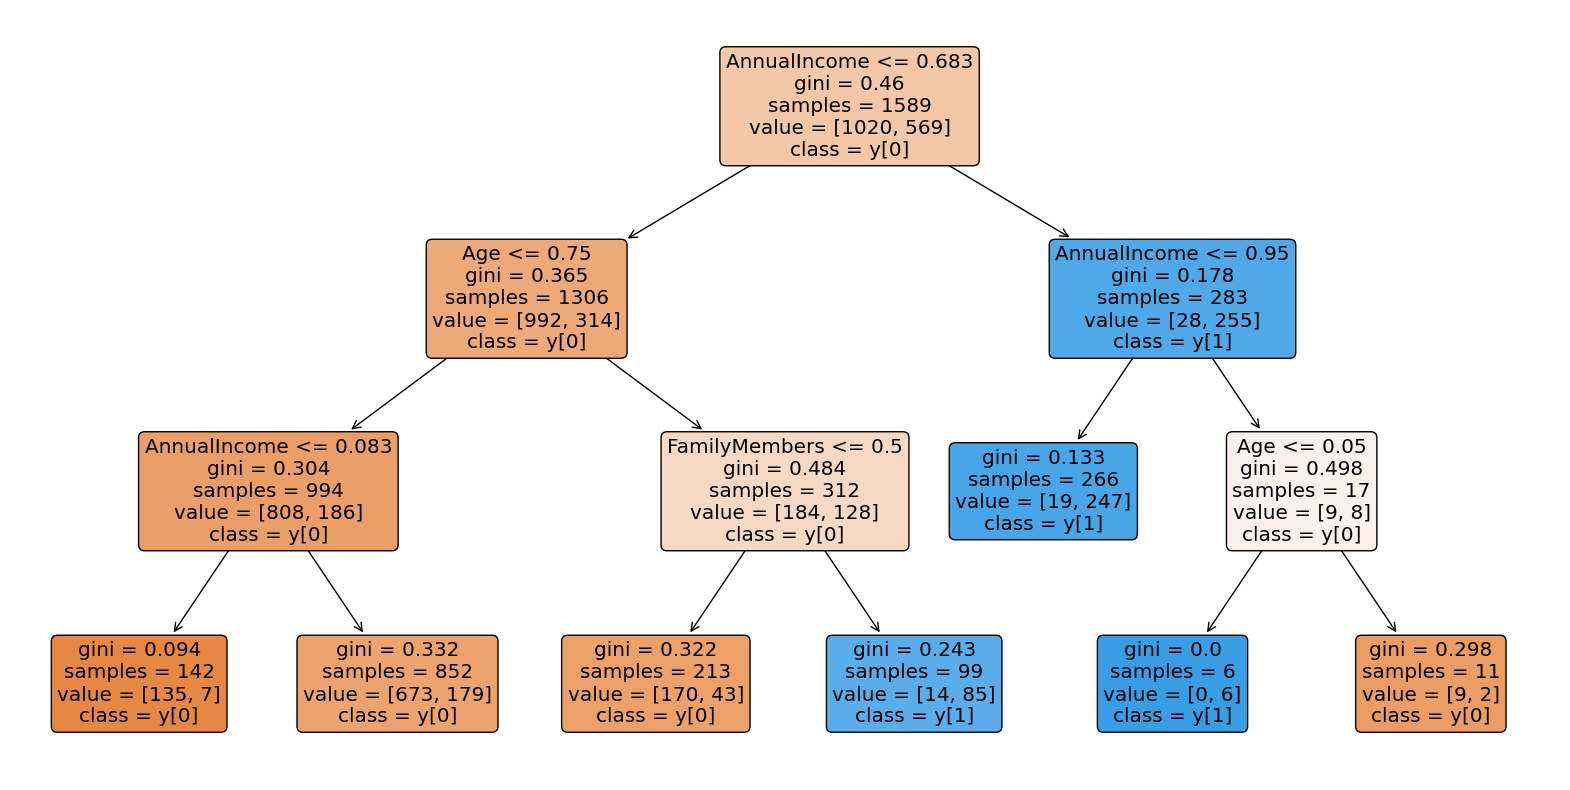

In [648]:
best_tree = random_search_DT.best_estimator_.named_steps['classifier']

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, proportion=False)
plt.show()

## Random Forest

In [649]:
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('preprocessor', [scaler,normalize,min_max_scaler]),
    ('classifier', RandomForestClassifier())
])

param_grid_RF = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'classifier__max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'classifier__min_samples_split': range(1,10),  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': range(1,10),  # Minimum number of samples required at each leaf node
    'classifier__bootstrap': [True, False],  # Method of selecting samples for training each tree
    'preprocessor': [scaler , normalize , min_max_scaler]

}

random_search_RF = RandomizedSearchCV(pipeline, param_grid_RF, cv=cv_shuffel)
random_search_RF.fit(X_train, y_train)


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt'],
                                        'classifier__min_samples_leaf': range(1, 10),
                                        'classifier__min_samples_split': range(1, 10),
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'preprocessor': [StandardScaler(),
                                                         Normalizer(),
                                                         MinMaxScaler()]})

In [650]:
random_search_RF.best_params_

{'preprocessor': StandardScaler(),
 'classifier__n_estimators': 200,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 4,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 10,
 'classifier__bootstrap': False}

In [651]:
random_search_RF.best_score_

0.8446540880503145

In [652]:
valid_RF = cross_val_score(random_search_RF.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_RF)

[0.85534591 0.85849057 0.86163522 0.82389937 0.81761006]


In [653]:
best_estimator = random_search_RF.best_estimator_
predictions = best_estimator.predict(X_test)

In [654]:
metrics_RF = classification_report(y_test, predictions)
print(metrics_RF)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398



## Kneighbors Classifier

In [655]:
from sklearn.neighbors import KNeighborsClassifier

In [656]:
param_grid_KNN = {
    'preprocessor': [scaler , normalize , min_max_scaler],
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors':[3,5,9,11],
    'classifier__p':np.arange(0.1,10,0.1),
    'classifier__weights':['uniform','distans']
}

pipeline = Pipeline([
    ('preprocessor', [scaler,normalize,min_max_scaler]),
    ('classifier', KNeighborsClassifier())
])

In [657]:
grid_search_KNN = RandomizedSearchCV(pipeline, param_grid_KNN, cv=cv_shuffel,scoring='accuracy')
grid_search_KNN.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   param_distributions={'classifier': [KNeighborsClassifier(n_neighbors=11,
                                                                            p=9.5)],
                                        'classifier__n_neighbors': [3, 5, 9,
                                                                    11],
                                        'classifier...
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'classifier__weights': ['uniform',
                                                                'distans'],
                                        'preprocessor': [StandardScaler(),
                                                         Normalizer(),
                                                         MinMaxScaler()]},
                   scoring='accuracy')

In [658]:
grid_search_KNN.best_params_

{'preprocessor': MinMaxScaler(),
 'classifier__weights': 'uniform',
 'classifier__p': 9.5,
 'classifier__n_neighbors': 11,
 'classifier': KNeighborsClassifier(n_neighbors=11, p=9.5)}

In [659]:
grid_search_KNN.best_score_

0.8012578616352203

In [660]:
valid_KNN = cross_val_score(grid_search_KNN.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_KNN)

[0.79245283 0.79874214 0.82389937 0.80188679 0.78930818]


In [661]:
random_search_KNN = RandomizedSearchCV(pipeline, param_grid_KNN, cv=cv_shuffel,scoring='accuracy')
random_search_KNN.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   param_distributions={'classifier': [KNeighborsClassifier(n_neighbors=11,
                                                                            p=7.9)],
                                        'classifier__n_neighbors': [3, 5, 9,
                                                                    11],
                                        'classifier...
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                                        'classifier__weights': ['uniform',
                                                                'distans'],
                                        'preprocessor': [StandardScaler(),
                                                         Normalizer(),
                                                         MinMaxScaler()]},
                   scoring='accuracy')

In [662]:
random_search_KNN.best_params_

{'preprocessor': MinMaxScaler(),
 'classifier__weights': 'uniform',
 'classifier__p': 7.9,
 'classifier__n_neighbors': 11,
 'classifier': KNeighborsClassifier(n_neighbors=11, p=7.9)}

In [663]:
random_search_KNN.best_score_

0.8012578616352203

In [664]:
valid_KNN = cross_val_score(random_search_KNN.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_KNN)

[0.79245283 0.79874214 0.82389937 0.80188679 0.78930818]


## SVM

In [665]:
from sklearn.svm import SVC

In [666]:
param_grid_SVM = {
    'preprocessor': [scaler , normalize , min_max_scaler],
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__gamma': ['scale', 'auto', 0.001, 0.0001],  # Kernel coefficient
    'classifier__kernel': ['rbf']  # Type of kernel to use
}


pipeline = Pipeline([
    ('preprocessor', [scaler,normalize,min_max_scaler]),
    ('classifier', SVC())
])

In [667]:
grid_search_SVM = GridSearchCV(pipeline, param_grid_SVM, cv=cv_shuffel, scoring='accuracy')
grid_search_SVM.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        [StandardScaler(), Normalizer(),
                                         MinMaxScaler()]),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.0001],
                         'classifier__kernel': ['rbf'],
                         'preprocessor': [StandardScaler(), Normalizer(),
                                          MinMaxScaler()]},
             scoring='accuracy')

In [668]:
grid_search_SVM.best_params_

{'classifier__C': 1,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'preprocessor': StandardScaler()}

In [669]:
grid_search_SVM.best_score_

0.8257861635220125

In [670]:
valid_SVM = cross_val_score(grid_search_SVM.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_SVM)

[0.82389937 0.81446541 0.86163522 0.82704403 0.80188679]


In [671]:
random_search_SVM = RandomizedSearchCV(pipeline, param_grid_SVM, cv=cv_shuffel, scoring='accuracy')
random_search_SVM.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              [StandardScaler(), Normalizer(),
                                               MinMaxScaler()]),
                                             ('classifier', SVC())]),
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__gamma': ['scale', 'auto',
                                                              0.001, 0.0001],
                                        'classifier__kernel': ['rbf'],
                                        'preprocessor': [StandardScaler(),
                                                         Normalizer(),
                                                         MinMaxScaler()]},
                   scoring='accuracy')

In [672]:
random_search_SVM.best_params_

{'preprocessor': StandardScaler(),
 'classifier__kernel': 'rbf',
 'classifier__gamma': 'scale',
 'classifier__C': 1}

In [673]:
random_search_SVM.best_score_

0.8257861635220125

In [674]:
valid_random_SVM = cross_val_score(random_search_SVM.best_estimator_, X_train, y_train, cv=cv_shuffel)
print(valid_random_SVM)

[0.82389937 0.81446541 0.86163522 0.82704403 0.80188679]


In [675]:
best_estimator = random_search_SVM.best_estimator_
predictions = best_estimator.predict(X_test)

In [676]:
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       257
           1       0.86      0.53      0.66       141

    accuracy                           0.80       398
   macro avg       0.82      0.74      0.76       398
weighted avg       0.81      0.80      0.79       398



In [677]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.40%
